In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()


In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [8]:
y = df["partner"] - 1
X = df.loc[:, ~df.columns.isin(["partner", "cntry", "idno"])]

X = pd.concat([X, pd.get_dummies(df["cntry"])], axis=1)
offset = int(X.shape[0] * .9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [9]:
params = {"n_estimators": 500,
         "max_depth": 2,
         "loss": "deviance"}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc["All", "All"]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc["All", "All"]

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc["All", "All"]
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc["All", "All"]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


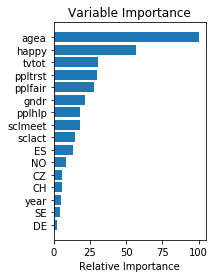

In [10]:
feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

+ Creating new features
+ Applying more overfitting-prevention strategies like subsampling
+ More iterations
+ Trying a different loss function
+ Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

In [19]:
#tested out different n_estimators, max-depth, exponential loss, min_leaf_samples, and these numbers produced the best results

params = {"n_estimators": 600,
         "max_depth": 2,
         "loss": "deviance"}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc["All", "All"]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc["All", "All"]

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc["All", "All"]
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc["All", "All"]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04732678668848882
Percent Type II errors: 0.1745771958537916

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18404907975460122


In [50]:
df.head(20)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,age_tv,happy_cat
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,180.0,1
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,354.0,1
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,24.0,0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,256.0,1
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,275.0,1
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0,228.0,0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0,60.0,1
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0,168.0,1
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0,248.0,0
10,CH,55.0,6,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,1.0,33.0,1


In [21]:
y = df["partner"] - 1
X = df.loc[:, ~df.columns.isin(["partner", "cntry", "idno"])]

offset = int(X.shape[0] * .9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [22]:
#running the model without the countries included
params = {"n_estimators": 600,
         "max_depth": 2,
         "loss": "deviance"}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc["All", "All"]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc["All", "All"]

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc["All", "All"]
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc["All", "All"]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04732678668848882
Percent Type II errors: 0.1745771958537916

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18404907975460122


In [23]:
df["age_tv"] = df["agea"] * df["tvtot"]

In [24]:
y = df["partner"] - 1
X = df.loc[:, ~df.columns.isin(["partner", "cntry", "idno"])]

offset = int(X.shape[0] * .9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [25]:
#running the model with added feature of age x tv

params = {"n_estimators": 600,
         "max_depth": 2,
         "loss": "deviance"}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc["All", "All"]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc["All", "All"]

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc["All", "All"]
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc["All", "All"]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04541734860883797
Percent Type II errors: 0.17389525368248773

Test set accuracy:
Percent Type I errors: 0.0687116564417178
Percent Type II errors: 0.18895705521472392


In [26]:
y = df["partner"] - 1
X = df.loc[:, ~df.columns.isin(["partner", "cntry", "idno", "tvtot", "agea"])]

offset = int(X.shape[0] * .9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [27]:
# running the model with age x tv feature and subtracting those individual features...model got worse
params = {"n_estimators": 600,
         "max_depth": 2,
         "loss": "deviance"}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc["All", "All"]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc["All", "All"]

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc["All", "All"]
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc["All", "All"]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.07310420076377523
Percent Type II errors: 0.2067648663393344

Test set accuracy:
Percent Type I errors: 0.10920245398773006
Percent Type II errors: 0.2049079754601227


In [28]:
from sklearn.decomposition import PCA

X = df.loc[:, ~df.columns.isin(["partner", "cntry", "idno"])]

sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([9.90429363e-01, 8.53144539e-03, 4.89102079e-04, 1.40520597e-04,
       1.35201641e-04, 9.67594892e-05, 9.15442778e-05, 3.50324612e-05,
       2.60162536e-05, 1.25763717e-05, 1.24387225e-05])

In [29]:
sklearn_pca.explained_variance_ratio_.cumsum()

array([0.99042936, 0.99896081, 0.99944991, 0.99959043, 0.99972563,
       0.99982239, 0.99991394, 0.99994897, 0.99997498, 0.99998756,
       1.        ])

In [30]:
sk_learn = PCA(n_components=5)
X_with5_components = sk_learn.fit_transform(X)

In [31]:
y = df["partner"] - 1
X = X_with5_components

offset = int(X.shape[0] * .9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [32]:
#running the model after PCA...errors got worse overall

params = {"n_estimators": 600,
         "max_depth": 2,
         "loss": "deviance"}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc["All", "All"]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc["All", "All"]

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc["All", "All"]
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc["All", "All"]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0328696126568467
Percent Type II errors: 0.18221494817239497

Test set accuracy:
Percent Type I errors: 0.06012269938650307
Percent Type II errors: 0.21226993865030674


In [33]:
df["agea"].describe()

count    8147.000000
mean       47.262182
std        18.316890
min        15.000000
25%        33.000000
50%        47.000000
75%        61.000000
max       114.000000
Name: agea, dtype: float64

In [35]:
df["happy"].describe()

count    8147.000000
mean        7.708482
std         1.720839
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: happy, dtype: float64

In [37]:
df["happy_cat"] = np.where(df["happy"] < 8, 0, 1)

In [38]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,age_tv,happy_cat
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,180.0,1
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,354.0,1
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,24.0,0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,256.0,1
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,275.0,1


In [42]:
df[df["agea"] < 20]["partner"].value_counts()

2.0    541
1.0      7
Name: partner, dtype: int64

In [45]:
df[(20 < df["agea"]) & (df["agea"] < 28)]["partner"].value_counts()

2.0    576
1.0    226
Name: partner, dtype: int64

In [47]:
df["partner"].value_counts()

1.0    5013
2.0    3134
Name: partner, dtype: int64

In [48]:
df[(28 < df["agea"]) & (df["agea"] < 35)]["partner"].value_counts()

1.0    474
2.0    237
Name: partner, dtype: int64

In [49]:
df[(35 < df["agea"]) & (df["agea"] < 50)]["partner"].value_counts()

1.0    1559
2.0     494
Name: partner, dtype: int64

In [56]:
y = df["partner"] - 1
X = df.loc[:, ~df.columns.isin(["partner", "cntry", "idno"])]
X = pd.concat([X, pd.get_dummies(df["cntry"])], axis=1)

offset = int(X.shape[0] * .9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [57]:
params = {"n_estimators": 600,
         "max_depth": 2,
         "loss": "deviance"}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc["All", "All"]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc["All", "All"]

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc["All", "All"]
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc["All", "All"]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.046644844517184945
Percent Type II errors: 0.17307692307692307

Test set accuracy:
Percent Type I errors: 0.06503067484662577
Percent Type II errors: 0.18282208588957055


In [61]:
params = {"n_estimators": 600,
         "max_depth": 2,
         "loss": "deviance",
         "subsample": .75}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc["All", "All"]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc["All", "All"]

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc["All", "All"]
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc["All", "All"]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04582651391162029
Percent Type II errors: 0.17034915439170759

Test set accuracy:
Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.18282208588957055
